# **PHISHGUARD: A Comprehensive Framework for Phishing Website Detection Using Machine Learning and Ensemble Models**

# Importing Required Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from catboost import CatBoostClassifier

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Filter warnings
warnings.filterwarnings('ignore')

## Dataset 03

## need to update
The dataset is borrowed from [Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .](https://archive.ics.uci.edu/dataset/327/phishing+websites)

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

## need to update
- samples: 11430
- features: 87

In [17]:
#Loading data into dataframe

file_path = 'dataset3.csv'
data1 = pd.read_csv(file_path)


In [18]:
data1.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [19]:
data1.shape

(11430, 89)

In [20]:
list(data1.columns)

['url',
 'length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_hyphens',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_or',
 'nb_eq',
 'nb_underscore',
 'nb_tilde',
 'nb_percent',
 'nb_slash',
 'nb_star',
 'nb_colon',
 'nb_comma',
 'nb_semicolumn',
 'nb_dollar',
 'nb_space',
 'nb_www',
 'nb_com',
 'nb_dslash',
 'http_in_path',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'punycode',
 'port',
 'tld_in_path',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'random_domain',
 'shortening_service',
 'path_extension',
 'nb_redirection',
 'nb_external_redirection',
 'length_words_raw',
 'char_repeat',
 'shortest_words_raw',
 'shortest_word_host',
 'shortest_word_path',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'domain_in_brand',
 'brand_in_subdomain',
 'brand_in_path',
 'suspecious_tld',
 'statistical_report',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'rati

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [22]:
# nunique value in columns

data1.nunique()

url                11429
length_url           324
length_hostname       83
ip                     2
nb_dots               19
                   ...  
web_traffic         4744
dns_record             2
google_index           2
page_rank             11
status                 2
Length: 89, dtype: int64

In [23]:
# We can see that there are no missing values in the Dataset
for col in data1.columns:
    unique_value_list = data1[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {data1[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

url has 11429 unique values
length_url has 324 unique values
length_hostname has 83 unique values
ip contains:			[0 1]
nb_dots has 19 unique values
nb_hyphens has 27 unique values
nb_at contains:			[0 1 2 3 4]
nb_qm contains:			[0 1 2 3]
nb_and has 15 unique values
nb_or contains:			[0]
nb_eq has 16 unique values
nb_underscore has 17 unique values
nb_tilde contains:			[0 1]
nb_percent has 25 unique values
nb_slash has 22 unique values
nb_star contains:			[0 1]
nb_colon contains:			[1 3 5 2 4 7]
nb_comma contains:			[0 1 2 4 3]
nb_semicolumn has 15 unique values
nb_dollar contains:			[0 1 2 3 6]
nb_space contains:			[ 0  1  3  2  5  4  6  7 18]
nb_www contains:			[1 0 2]
nb_com contains:			[0 1 2 3 6 5 4]
nb_dslash contains:			[0 1]
http_in_path contains:			[0 1 4 3 2]
https_token contains:			[1 0]
ratio_digits_url has 1414 unique values
ratio_digits_host has 241 unique values
punycode contains:			[0 1]
port contains:			[0 1]
tld_in_path contains:			[0 1]
tld_in_subdomain contains:			[0

According to the Data descrition, these are the meaning of the values in the data
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

In [24]:
# Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling
data1 = data1.drop(data1.columns[0],axis=1)
data1

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,84,18,0,5,0,1,1,0,0,1,...,1,0,0,211,6728,0,0,1,0,phishing
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [25]:
# Encode 'legitimate' as 0 and 'phishing' as 1
data1['status'] = data1['status'].map({'legitimate': 1, 'phishing': 0})



In [26]:
data1

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,0
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,1
11426,84,18,0,5,0,1,1,0,0,1,...,1,0,0,211,6728,0,0,1,0,0
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,2809,8515,8,0,1,10,1
11428,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,1


In [27]:
#description of dataset

data1.describe().T

,count,mean,std,min,25%,50%,75%,max
length_url,11430.0,61.126684,5.529732e+01,12.0,33.0,47.0,71.0,1641.0
length_hostname,11430.0,21.090289,1.077717e+01,4.0,15.0,19.0,24.0,214.0
ip,11430.0,0.150569,3.576436e-01,0.0,0.0,0.0,0.0,1.0
nb_dots,11430.0,2.480752,1.369686e+00,1.0,2.0,2.0,3.0,24.0
nb_hyphens,11430.0,0.997550,2.087087e+00,0.0,0.0,0.0,1.0,43.0
...,...,...,...,...,...,...,...,...
web_traffic,11430.0,856756.643307,1.995606e+06,0.0,0.0,1651.0,373845.5,10767986.0
dns_record,11430.0,0.020122,1.404254e-01,0.0,0.0,0.0,0.0,1.0
google_index,11430.0,0.533946,4.988682e-01,0.0,0.0,1.0,1.0,1.0
page_rank,11430.0,3.185739,2.536955e+00,0.0,1.0,3.0,5.0,10.0


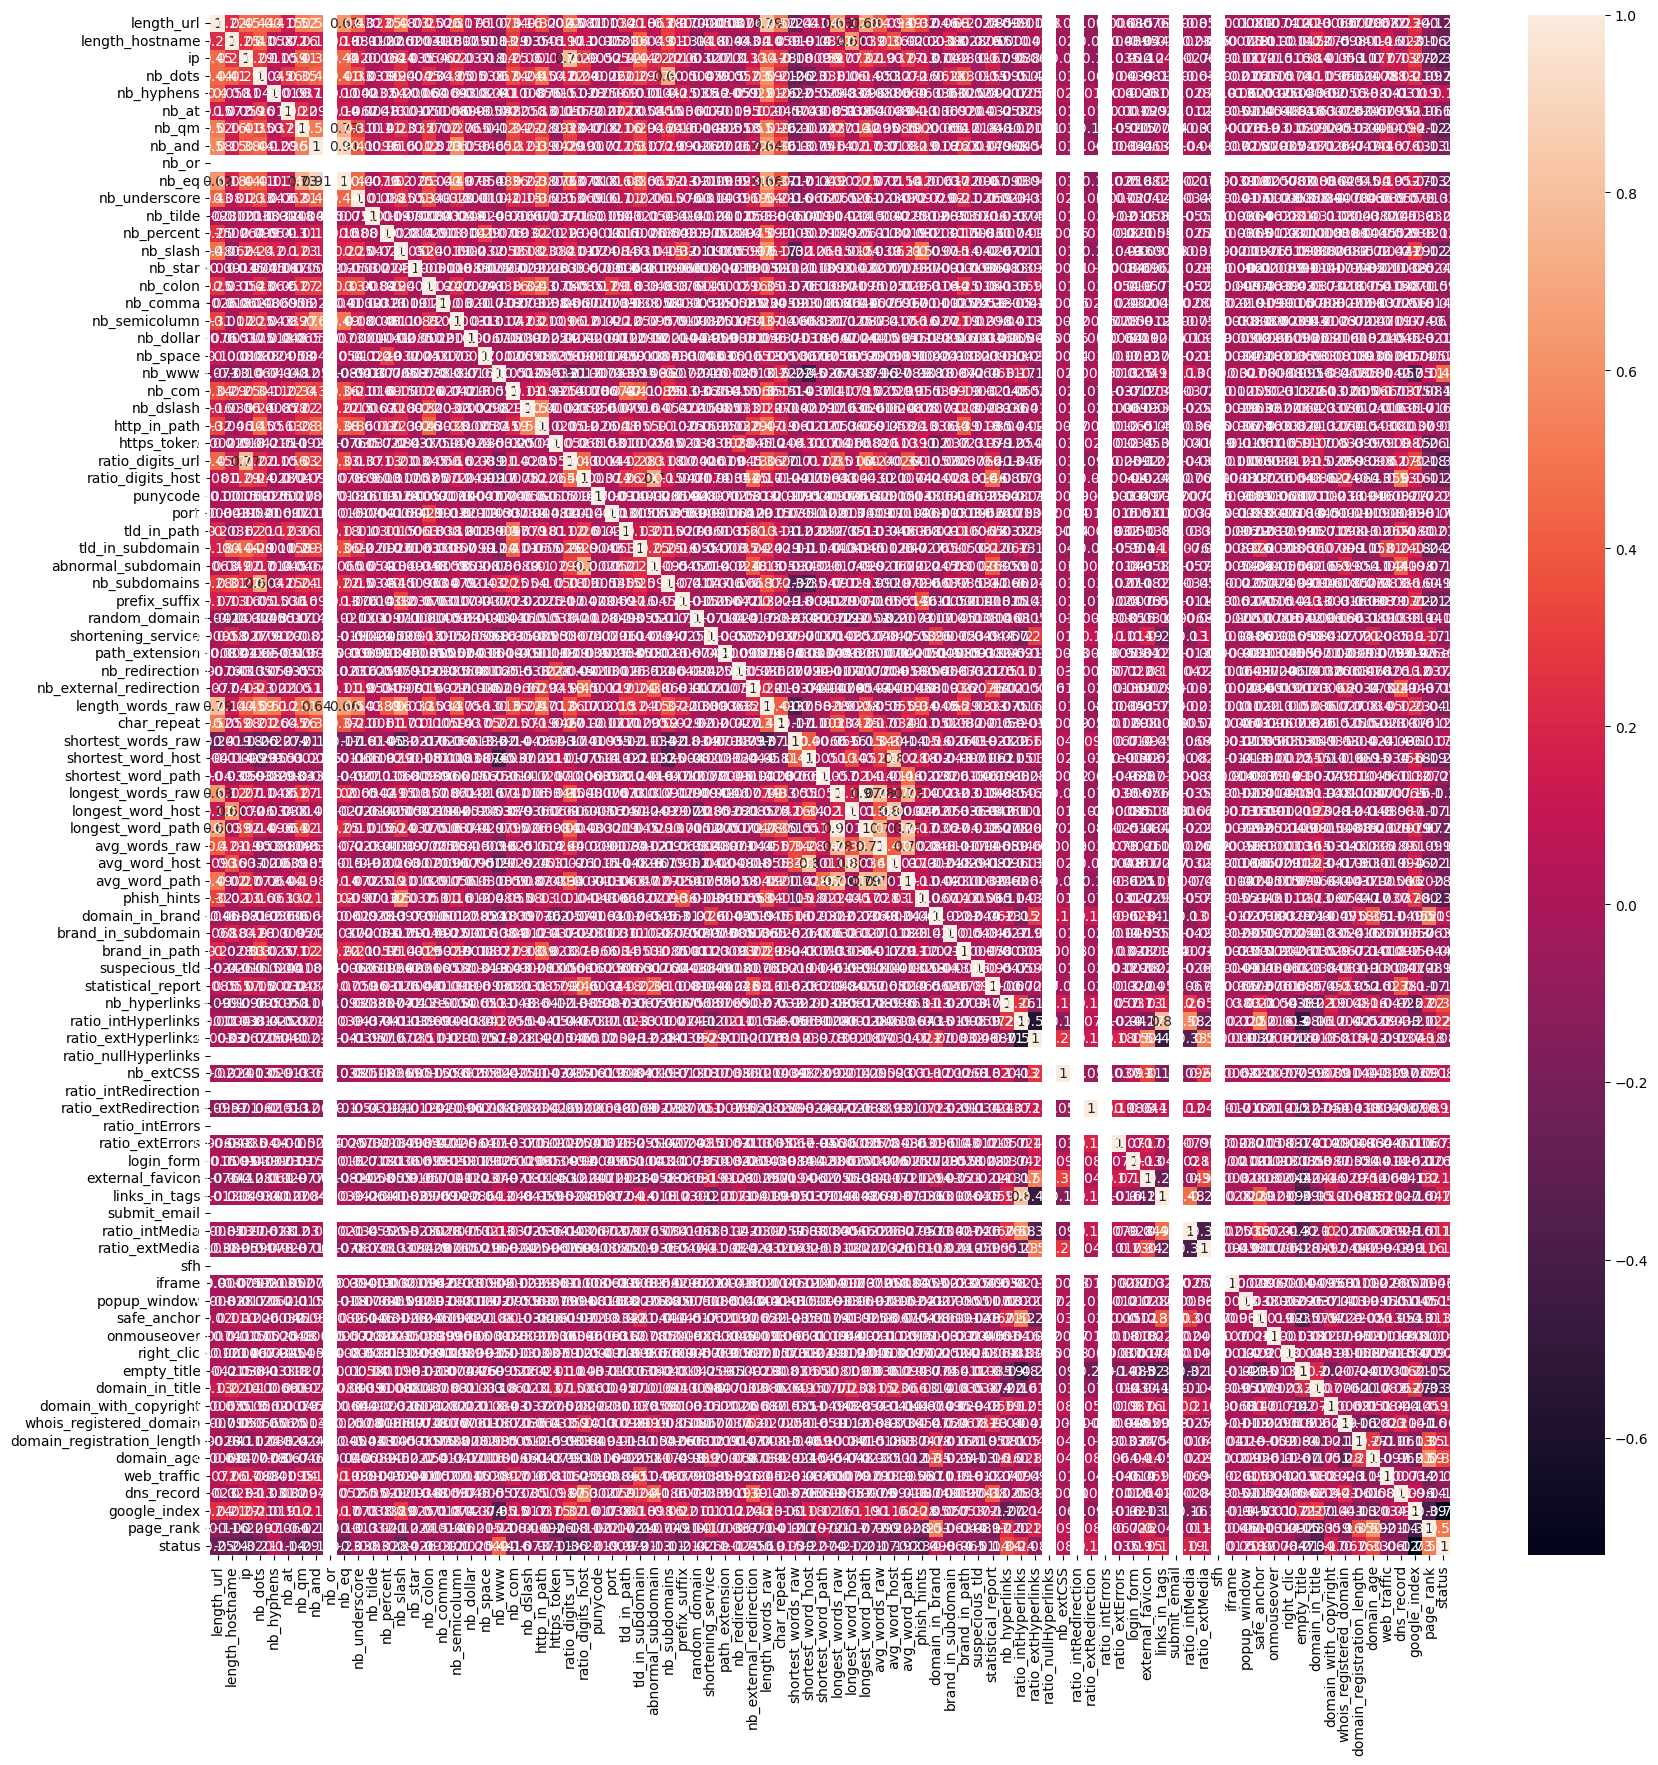

In [28]:
#Correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(), annot=True)
plt.show()

### Distribution of Phishing and Legitimate Sites in Dataset

status
1    5715
0    5715
Name: count, dtype: int64


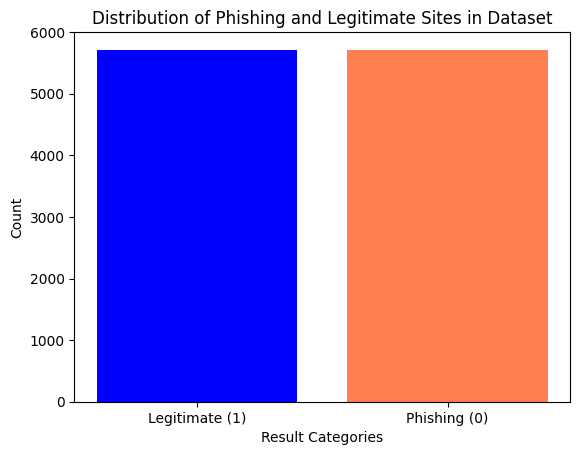

In [29]:
# Count the occurrences of each category in the 'Result' column
result_counts = data1['status'].value_counts()
print(data1['status'].value_counts())
# Defining colors for the bar chart based on the index of result_counts
# (assuming -1 for Phishing and 1 for Legitimate)
colors = ['Coral' if index == 0 else 'blue' for index in result_counts.index]

# Define labels for the categories
labels = ['Legitimate (1)','Phishing (0)']

# Create an enhanced bar chart
plt.bar(labels, result_counts.values, color=colors)
plt.xlabel('Result Categories')
plt.ylabel('Count')
plt.title('Distribution of Phishing and Legitimate Sites in Dataset')
plt.show()

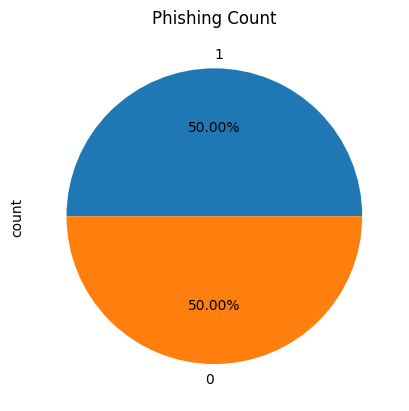

In [31]:
# Phishing Count in pie chart

data1['status'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

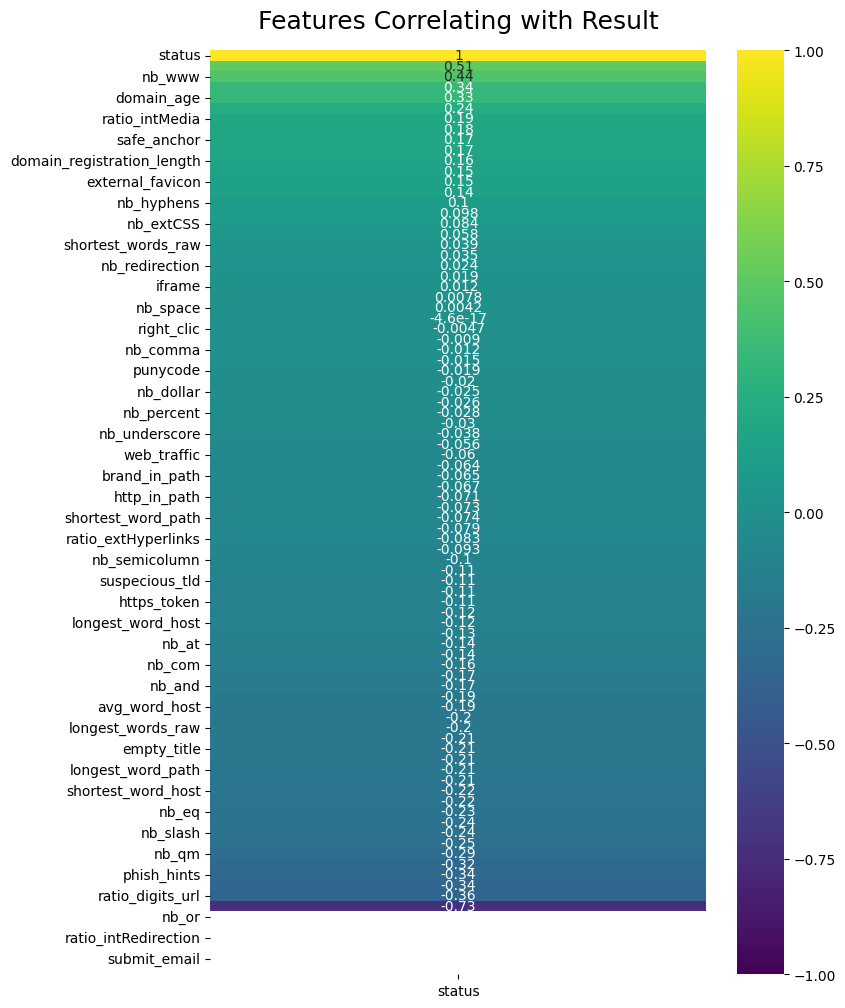

In [32]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data1.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

In [33]:
# Creating holders to store the model performance results
ML_Model = []
ML_Config = []
accuracy = []
f1_score = []
recall = []
precision = []
auc_roc = []  # Adding a holder for AUC-ROC

# Function to call for storing the results
def storeResults(model,config, a, b, c, d, e):
    ML_Model.append(model)
    ML_Config.append(config)
    accuracy.append(round(a, 6))
    f1_score.append(round(b, 6))
    recall.append(round(c, 6))
    precision.append(round(d, 6))
    auc_roc.append(round(e, 6))

---

# Support Vector Machine Classifier



In [34]:
# Assuming X and y are your features and labels
X = data1.drop(["status"], axis=1)
y = data1["status"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(SVC(kernel='linear'), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with SVM
print("\n=== RFECV Feature Selection with SVM ===")
svm_estimator = SVC(kernel='linear')  # Using a linear kernel for feature selection

rfecv = RFECV(estimator=svm_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=svm_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run SVM with Hyperparameter Tuning on different configurations
print("\n=== SVM Model Performance with Hyperparameter Tuning ===")

# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'C': [10, 100],  # Add different C values for regularization
    'gamma': [0.1],  # Explore a wider range of gamma values
    'kernel': ['rbf']  # Include additional kernels for non-linear classification
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning SVM with {name} configuration...")

    # GridSearchCV to find the best parameters for the SVC model
    svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)  # Set probability=True for AUC-ROC calculation

    # Fitting the model for grid search with the training data
    svc.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_svc = svc.predict(X_train_cfg)
    y_test_svc = svc.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_svc_proba = svc.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_svc_proba = svc.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Support Vector Machine model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_svc),
            metrics.accuracy_score(y_test, y_test_svc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_svc),
            metrics.f1_score(y_test, y_test_svc),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_svc),
            metrics.recall_score(y_test, y_test_svc),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_svc),
            metrics.precision_score(y_test, y_test_svc),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_svc_proba),
            metrics.roc_auc_score(y_test, y_test_svc_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nSupport Vector Machine Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('Support Vector Machine',
                 name,
                 metrics.accuracy_score(y_test, y_test_svc),
                 metrics.f1_score(y_test, y_test_svc),
                 metrics.recall_score(y_test, y_test_svc),
                 metrics.precision_score(y_test, y_test_svc),
                 metrics.roc_auc_score(y_test, y_test_svc_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(svc.best_params_)


=== SelectKBest Feature Selection ===


Optimal number of features to select using SelectKBest: 80

=== RFECV Feature Selection with SVM ===
Optimal number of features selected by RFECV: 58

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 19

=== SVM Model Performance with Hyperparameter Tuning ===

Running SVM with Original Data configuration...

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score  Recall  Precision  AUC-ROC
Training  1.000000  1.000000     1.0   1.000000 1.000000
    Test  0.673666  0.756209     1.0   0.607987 0.799234
Best hyperparameters found by GridSearchCV:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Running SVM with Normalized Data configuration...

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.991689  0.991668 0.992321   0.991017 0.998736
    Test  0.961505  0.962199 0.968021   0.956447 0.991474
Best hyperparameters found by GridSearchCV:
{'C': 100, 'gamma': 0.1, 'k

# Random Forest Classifier


In [35]:
# Assuming X and y are your features and labels
X = data1.drop(["status"], axis=1)
y = data1["status"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(RandomForestClassifier(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with RandomForestClassifier
print("\n=== RFECV Feature Selection with Random Forest ===")
rf_estimator = RandomForestClassifier()

rfecv = RFECV(estimator=rf_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=rf_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run RandomForestClassifier with Hyperparameter Tuning on different configurations
print("\n=== Random Forest Model Performance with Hyperparameter Tuning ===")

# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    'max_features': ['log2'],
    'bootstrap': [False],
    'criterion': ['gini', 'entropy']
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning Random Forest with {name} configuration...")

    # GridSearchCV to find the best parameters for the RandomForestClassifier
    rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)  # 5-fold cross-validation

    # Fitting the model for grid search with the training data
    rf.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_rf = rf.predict(X_train_cfg)
    y_test_rf = rf.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_rf_proba = rf.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_rf_proba = rf.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Random Forest model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_rf),
            metrics.accuracy_score(y_test, y_test_rf),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_rf),
            metrics.f1_score(y_test, y_test_rf),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_rf),
            metrics.recall_score(y_test, y_test_rf),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_rf),
            metrics.precision_score(y_test, y_test_rf),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_rf_proba),
            metrics.roc_auc_score(y_test, y_test_rf_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nRandom Forest Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('Random Forest',
                 name,
                 metrics.accuracy_score(y_test, y_test_rf),
                 metrics.f1_score(y_test, y_test_rf),
                 metrics.recall_score(y_test, y_test_rf),
                 metrics.precision_score(y_test, y_test_rf),
                 metrics.roc_auc_score(y_test, y_test_rf_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(rf.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 78

=== RFECV Feature Selection with Random Forest ===
Optimal number of features selected by RFECV: 77

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 28

=== Random Forest Model Performance with Hyperparameter Tuning ===

Running Random Forest with Original Data configuration...

Random Forest Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  1.000000  1.000000 1.000000   1.000000 1.000000
    Test  0.971129  0.971649 0.977528   0.965841 0.995234
Best hyperparameters found by GridSearchCV:
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Running Random Forest with Normalized Data configuration...

Random Forest Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  

# Gradient Boosting Classifier

In [38]:
# Assuming X and y are your features and labels
X = data1.drop(["status"], axis=1)
y = data1["status"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(GradientBoostingClassifier(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with GradientBoostingClassifier
print("\n=== RFECV Feature Selection with Gradient Boosting ===")
gbc_estimator = GradientBoostingClassifier()

rfecv = RFECV(estimator=gbc_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=gbc_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run GradientBoostingClassifier with Hyperparameter Tuning on different configurations
print("\n=== Gradient Boosting Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 6, 7]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning Gradient Boosting with {name} configuration...")

    # GridSearchCV to find the best parameters for the GradientBoostingClassifier
    gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    gbc.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_gbc = gbc.predict(X_train_cfg)
    y_test_gbc = gbc.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_gbc_proba = gbc.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_gbc_proba = gbc.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Gradient Boosting model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_gbc),
            metrics.accuracy_score(y_test, y_test_gbc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_gbc),
            metrics.f1_score(y_test, y_test_gbc),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_gbc),
            metrics.recall_score(y_test, y_test_gbc),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_gbc),
            metrics.precision_score(y_test, y_test_gbc),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_gbc_proba),
            metrics.roc_auc_score(y_test, y_test_gbc_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nGradient Boosting Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('Gradient Boosting',
                 name,
                 metrics.accuracy_score(y_test, y_test_gbc),
                 metrics.f1_score(y_test, y_test_gbc),
                 metrics.recall_score(y_test, y_test_gbc),
                 metrics.precision_score(y_test, y_test_gbc),
                 metrics.roc_auc_score(y_test, y_test_gbc_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(gbc.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 70

=== RFECV Feature Selection with Gradient Boosting ===
Optimal number of features selected by RFECV: 55

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 22

=== Gradient Boosting Model Performance with Hyperparameter Tuning ===

Running Gradient Boosting with Original Data configuration...

Gradient Boosting Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  1.000000  1.000000 1.000000   1.000000 1.000000
    Test  0.971129  0.971527 0.973207   0.969854 0.995871
Best hyperparameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400}

Running Gradient Boosting with Normalized Data configuration...

Gradient Boosting Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  1.000000  1.000000 1.000000   1.000000 1.000000
    Test  0.969816  0.

# CatBoost Classifier

In [49]:
# Assuming X and y are your features and labels
X = data1.drop(["status"], axis=1)
y = data1["status"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(CatBoostClassifier(silent=True), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with CatBoostClassifier
print("\n=== RFECV Feature Selection with CatBoost ===")
cat_estimator = CatBoostClassifier(silent=True)

rfecv = RFECV(estimator=cat_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=cat_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run CatBoostClassifier with Hyperparameter Tuning on different configurations
print("\n=== CatBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1],
    'depth': [6, 8, 10],
    'iterations': [200, 300, 400]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning CatBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the CatBoostClassifier
    cat = GridSearchCV(CatBoostClassifier(silent=True), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    cat.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_cat = cat.predict(X_train_cfg)
    y_test_cat = cat.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_cat_proba = cat.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_cat_proba = cat.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the CatBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_cat),
            metrics.accuracy_score(y_test, y_test_cat),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_cat),
            metrics.f1_score(y_test, y_test_cat),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_cat),
            metrics.recall_score(y_test, y_test_cat),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_cat),
            metrics.precision_score(y_test, y_test_cat),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_cat_proba),
            metrics.roc_auc_score(y_test, y_test_cat_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nCatBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('CatBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_cat),
                 metrics.f1_score(y_test, y_test_cat),
                 metrics.recall_score(y_test, y_test_cat),
                 metrics.precision_score(y_test, y_test_cat),
                 metrics.roc_auc_score(y_test, y_test_cat_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(cat.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 75

=== RFECV Feature Selection with CatBoost ===
Optimal number of features selected by RFECV: 61

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 25

=== CatBoost Model Performance with Hyperparameter Tuning ===

Running CatBoost with Original Data configuration...

CatBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  1.000000  1.000000 1.000000   1.000000 1.000000
    Test  0.971566  0.972043 0.976664   0.967466 0.996391
Best hyperparameters found by GridSearchCV:
{'depth': 8, 'iterations': 400, 'learning_rate': 0.1}

Running CatBoost with Normalized Data configuration...

CatBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  1.000000  1.000000 1.000000   1.000000  1.00000
    Test  0.971566  0.972043 0.976664   0.967466  0.99639
Best hyperparameters fou

# AdaBoost Classifier

In [46]:
# Assuming X and y are your features and labels
X = data1.drop(["status"], axis=1)
y = data1["status"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(AdaBoostClassifier(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with AdaBoostClassifier
print("\n=== RFECV Feature Selection with AdaBoost ===")
ada_estimator = AdaBoostClassifier()

rfecv = RFECV(estimator=ada_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=ada_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run AdaBoostClassifier with Hyperparameter Tuning on different configurations
print("\n=== AdaBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning AdaBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the AdaBoostClassifier
    ada = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    ada.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_ada = ada.predict(X_train_cfg)
    y_test_ada = ada.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_ada_proba = ada.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_ada_proba = ada.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the AdaBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_ada),
            metrics.accuracy_score(y_test, y_test_ada),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_ada),
            metrics.f1_score(y_test, y_test_ada),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_ada),
            metrics.recall_score(y_test, y_test_ada),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_ada),
            metrics.precision_score(y_test, y_test_ada),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_ada_proba),
            metrics.roc_auc_score(y_test, y_test_ada_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nAdaBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('AdaBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_ada),
                 metrics.f1_score(y_test, y_test_ada),
                 metrics.recall_score(y_test, y_test_ada),
                 metrics.precision_score(y_test, y_test_ada),
                 metrics.roc_auc_score(y_test, y_test_ada_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(ada.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 73

=== RFECV Feature Selection with AdaBoost ===
Optimal number of features selected by RFECV: 35

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 15

=== AdaBoost Model Performance with Hyperparameter Tuning ===

Running AdaBoost with Original Data configuration...

AdaBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.962161  0.962103 0.963581   0.960630 0.994697
    Test  0.957568  0.958063 0.957649   0.958478 0.990398
Best hyperparameters found by GridSearchCV:
{'learning_rate': 1.0, 'n_estimators': 200}

Running AdaBoost with Normalized Data configuration...

AdaBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.962161  0.962103 0.963581   0.960630 0.994697
    Test  0.957568  0.958063 0.957649   0.958478 0.990398
Best hyperparameters found by Grid

# XGBoost Classifier

In [50]:
# Assuming X and y are your features and labels
X = data1.drop(["status"], axis=1)
y = data1["status"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with XGBoost
print("\n=== RFECV Feature Selection with XGBoost ===")
xgb_estimator = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

rfecv = RFECV(estimator=xgb_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=xgb_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run XGBoost with Hyperparameter Tuning on different configurations
print("\n=== XGBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning XGBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the XGBoost model
    xgbm = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    xgbm.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_xgbm = xgbm.predict(X_train_cfg)
    y_test_xgbm = xgbm.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_xgbm_proba = xgbm.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_xgbm_proba = xgbm.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the XGBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_xgbm),
            metrics.accuracy_score(y_test, y_test_xgbm),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_xgbm),
            metrics.f1_score(y_test, y_test_xgbm),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_xgbm),
            metrics.recall_score(y_test, y_test_xgbm),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_xgbm),
            metrics.precision_score(y_test, y_test_xgbm),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_xgbm_proba),
            metrics.roc_auc_score(y_test, y_test_xgbm_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nXGBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('XGBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_xgbm),
                 metrics.f1_score(y_test, y_test_xgbm),
                 metrics.recall_score(y_test, y_test_xgbm),
                 metrics.precision_score(y_test, y_test_xgbm),
                 metrics.roc_auc_score(y_test, y_test_xgbm_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(xgbm.best_params_)


=== SelectKBest Feature Selection ===


Optimal number of features to select using SelectKBest: 49

=== RFECV Feature Selection with XGBoost ===
Optimal number of features selected by RFECV: 44

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 19

=== XGBoost Model Performance with Hyperparameter Tuning ===

Running XGBoost with Original Data configuration...

XGBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.994969  0.994961 0.996270   0.993654 0.999859
    Test  0.970254  0.970486 0.966292   0.974717 0.995650
Best hyperparameters found by GridSearchCV:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}

Running XGBoost with Normalized Data configuration...

XGBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.994969  0.994961 0.996270   0.993654 0.999859
    Test  0.970254  0.970486 0.966292   0.9

# Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
# Creating the dataframe
result = pd.DataFrame({ 
    'ML Model' : ML_Model,
    'Configuration': ML_Config,
    'Accuracy' : [f"{acc * 100:.3f}%" for acc in accuracy],
    'F1 Score' : [f"{f1 * 100:.3f}%" for f1 in f1_score],
    'Recall'   : [f"{rec * 100:.3f}%" for rec in recall],
    'Precision': [f"{prec * 100:.3f}%" for prec in precision],
    'ROC_AUC'  : [f"{roc * 100:.3f}%" for roc in auc_roc],
})

# Displaying the result
print(result)

# Saving the result to a CSV file
result.to_csv('model_results3.csv', index=False)

# Sorting the dataframe on accuracy and F1 Score
sorted_result = result.sort_values(by=['Accuracy', 'F1 Score'], ascending=False).reset_index(drop=True)

# Displaying the sorted result
print(sorted_result)

# Saving the sorted result to a CSV file
sorted_result.to_csv('sorted_model_results3.csv', index=False)

                  ML Model    Configuration Accuracy F1 Score    Recall  \
0   Support Vector Machine    Original Data  67.367%  75.621%  100.000%   
1   Support Vector Machine  Normalized Data  96.151%  96.220%   96.802%   
2   Support Vector Machine      SelectKBest  96.107%  96.179%   96.802%   
3   Support Vector Machine            RFECV  96.194%  96.258%   96.716%   
4   Support Vector Machine              PCA  94.969%  95.054%   95.506%   
5            Random Forest    Original Data  97.113%  97.165%   97.753%   
6            Random Forest  Normalized Data  96.763%  96.824%   97.493%   
7            Random Forest      SelectKBest  97.113%  97.165%   97.753%   
8            Random Forest            RFECV  96.894%  96.944%   97.321%   
9            Random Forest              PCA  94.969%  95.075%   95.938%   
10       Gradient Boosting    Original Data  97.113%  97.153%   97.321%   
11       Gradient Boosting  Normalized Data  96.982%  97.030%   97.407%   
12       Gradient Boostin